In [129]:
import os
import numpy as np
import pandas as pd
import nltk
import warnings

In [130]:
df = pd.read_csv("Restaurant_and_Food_Establishment_Inspections__October_2016_to_Present.csv")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,70,78,83,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,105,106,107,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
list(df)

['Restaurant Name',
 'Inspection Type',
 'Inspection Date',
 'Inspection Score',
 'Street Number',
 'Street Name',
 'Street Direction',
 'Street Type',
 'Street Unit',
 'Street Address',
 'Zip Code',
 'Violation Description - 1',
 'Violation Points - 1',
 'Violation Detail - 1',
 'Violation Memo - 1',
 'Violation Description - 2',
 'Violation Points - 2',
 'Violation Detail - 2',
 'Violation Memo - 2',
 'Violation Description - 3',
 'Violation Points - 3',
 'Violation Detail - 3',
 'Violation Memo - 3',
 'Violation Description - 4',
 'Violation Points - 4',
 'Violation Detail - 4',
 'Violation Memo - 4',
 'Violation Description - 5',
 'Violation Points - 5',
 'Violation Detail - 5',
 'Violation Memo - 5',
 'Violation Description - 6',
 'Violation Points - 6',
 'Violation Detail - 6',
 'Violation Memo - 6',
 'Violation Description - 7',
 'Violation Points - 7',
 'Violation Detail - 7',
 'Violation Memo - 7',
 'Violation Description - 8',
 'Violation Points - 8',
 'Violation Detail - 8',

In [132]:
def delete_column(df):
    for col in df.columns:
        if 'Name' in col:
            del df[col]
        elif 'Street' in col:
            del df[col]
        elif 'Zip' in col:
            del df[col]
        elif 'Date' in col:
            del df[col]
        elif 'Type' in col:
            del df[col]
        elif 'Month' in col:
            del df[col]
        elif 'Points' in col:
            del df[col]
        elif 'Year' in col:
            del df[col]
        elif 'Lat' in col:
            del df[col]
        elif 'Memo' in col :
            del df[col]
    return df
df = delete_column(df)
df.dtypes

Inspection Score               int64
Violation Description - 1     object
Violation Detail - 1          object
Violation Description - 2     object
Violation Detail - 2          object
Violation Description - 3     object
Violation Detail - 3          object
Violation Description - 4     object
Violation Detail - 4          object
Violation Description - 5     object
Violation Detail - 5          object
Violation Description - 6     object
Violation Detail - 6          object
Violation Description - 7     object
Violation Detail - 7          object
Violation Description - 8     object
Violation Detail - 8          object
Violation Description - 9     object
Violation Detail - 9          object
Violation Description - 10    object
Violation Detail - 10         object
Violation Description - 11    object
Violation Detail - 11         object
Violation Description - 12    object
Violation Detail - 12         object
Violation Description - 13    object
Violation Detail - 13         object
V

In [133]:
df = df.fillna('perfect')
df.head()

,Inspection Score,Violation Description - 1,Violation Detail - 1,Violation Description - 2,Violation Detail - 2,Violation Description - 3,Violation Detail - 3,Violation Description - 4,Violation Detail - 4,Violation Description - 5,...,Violation Description - 21,Violation Detail - 21,Violation Description - 22,Violation Detail - 22,Violation Description - 23,Violation Detail - 23,Violation Description - 24,Violation Detail - 24,Violation Description - 25,Violation Detail - 25
0,81,*03 Food products not maintained at 135øF or a...,228.75 Food. Time and temperature co...,*09 Food protected cross contamination arrang...,228.66 Food. Preventing food and ing...,*22 Handlers-Certificate Not On Site,Sec. 17-2.2(d)(1)(A) (d) Food handlers. (...,*28 Date marking commercially prepared RTE/ TC...,228.75 Food. Time and temperature co...,*29 Food thermometers provided and accessible,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect
1,90,"*31 Individual, disposable towels",228.175 Physical Facilities. Handwas...,*46 A ware washing sink not used for hand wash...,"228.111 Equipment, Utensils, and Linens. ...",*02 Cold Hold (41øF/45øF or below),228.75 Food. Time and temperature co...,*19 One Inch Air Gap,"228.146 Water, Plumbing, and Waste. ...",*35 Hair Restraints effective,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect
2,91,*22 Handlers-Certificate Not On Site,Sec. 17-2.2(d)(1)(A) (d) Food handlers. (...,*21 RFSM - Not On Site,Sec. 17-2.2(c)(1)(D) (c) Registered food ...,"*31 Individual, disposable towels",228.175 Physical Facilities. Handwas...,"*46 Toilet tissue, availability",228.176 Physical Facilities. Toilets...,*42 Floors/walls/ceiling/nonfood dirty,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect
3,83,"*07 Food safe, good condition, unadulterated, ...","228.61 Food. Condition safe, unadulte...",*09 Food protected cross contamination arrang...,228.66 Food. Preventing food and ing...,"*28 Date marking > 24 hrs,on site,temp 41F",228.75 Food. Time and temperature co...,"*10 Chlorine sanitizer concentration, minimum ...","228.111 Equipment, Utensils, and Linens. ...",*10 Clean Sight and Touch,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect
4,100,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect


In [134]:
df.shape

(32871, 51)

In [137]:
df[df['Inspection Score'] < ]



,Inspection Score,Violation Description - 1,Violation Detail - 1,Violation Description - 2,Violation Detail - 2,Violation Description - 3,Violation Detail - 3,Violation Description - 4,Violation Detail - 4,Violation Description - 5,...,Violation Description - 21,Violation Detail - 21,Violation Description - 22,Violation Detail - 22,Violation Description - 23,Violation Detail - 23,Violation Description - 24,Violation Detail - 24,Violation Description - 25,Violation Detail - 25
26151,-5,*21 A establishment shall have written procedu...,228.45 Contamination Events Clean-up ...,*47 OTHER VIOLATIONS,229.164 Food. (b) Approved sources. ...,"*35 Eating food, chewing gum, drinking beverag...",228.42 Management and Personnel. Food ...,"*34 Outer door: solid,selfclosing,tightfitting",228.174 Physical Facilities. Functio...,perfect,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect


In [7]:
df = df

In [8]:
df_inspection_score = df['Inspection Score']
data = df[df.columns.difference(['Inspection Score'])]

In [9]:
data = data.replace('[^a-zA-Z0-9 ]', '', regex = True)
data.head(5)

,Violation Description - 1,Violation Description - 10,Violation Description - 11,Violation Description - 12,Violation Description - 13,Violation Description - 14,Violation Description - 15,Violation Description - 16,Violation Description - 17,Violation Description - 18,...,Violation Detail - 23,Violation Detail - 24,Violation Detail - 25,Violation Detail - 3,Violation Detail - 4,Violation Detail - 5,Violation Detail - 6,Violation Detail - 7,Violation Detail - 8,Violation Detail - 9
0,03 Food products not maintained at 135F or above,42 Dirty nonfood contact surfaces,47 Handwashing signage,perfect,perfect,perfect,perfect,perfect,perfect,perfect,...,perfect,perfect,perfect,Sec 1722d1A d Food handlers 2 Food handle...,22875 Food Time and temperature cont...,228108 Equipment Utensils and Linens ...,228149 Water Plumbing and Waste Plum...,22842 Management and Personnel Food Co...,22869 Food Preventing contamination ...,228125 Preventing Contamination a Ki...
1,31 Individual disposable towels,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,...,perfect,perfect,perfect,22875 Food Time and temperature cont...,228146 Water Plumbing and Waste Plum...,22843 Management and Personnel Hair restrai...,perfect,perfect,perfect,perfect
2,22 HandlersCertificate Not On Site,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,...,perfect,perfect,perfect,228175 Physical Facilities Handwashi...,228176 Physical Facilities Toilets a...,228114 Equipment Utensils and Linens ...,228248 Compliance Conditions of rete...,perfect,perfect,perfect
3,07 Food safe good condition unadulterated and ...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,...,perfect,perfect,perfect,22875 Food Time and temperature cont...,228111 Equipment Utensils and Linens ...,228113 Equipment Utensils and Linens ...,228104 Equipment Utensils and Linens ...,22869 Food Preventing contamination ...,perfect,perfect
4,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,...,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect,perfect


In [10]:
data.shape

(32871, 50)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


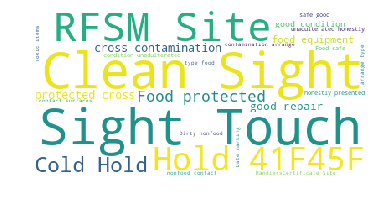

In [12]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0,relative_scaling=1.0).generate(' '.join(data['Violation Description - 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

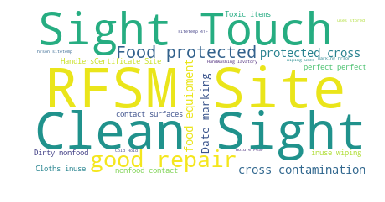

In [13]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 2']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

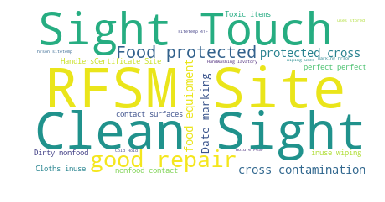

In [14]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 2']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

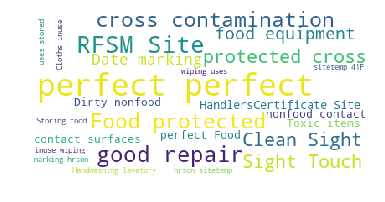

In [15]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 3']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

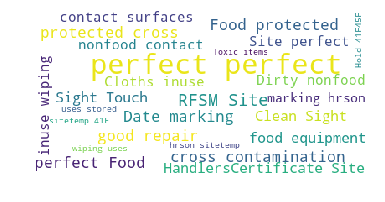

In [16]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 4']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

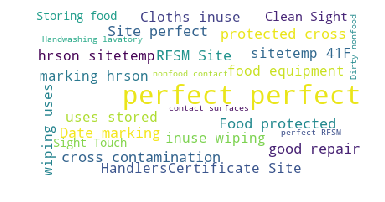

In [17]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 5']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

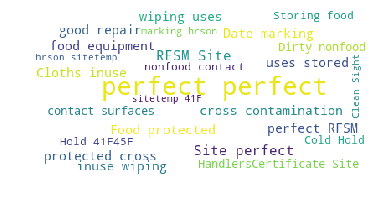

In [18]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 6']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

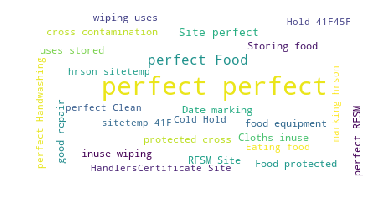

In [19]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 7']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

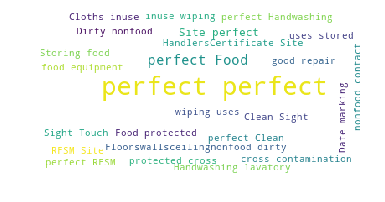

In [20]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 8']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

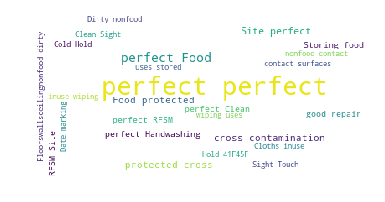

In [21]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 9']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

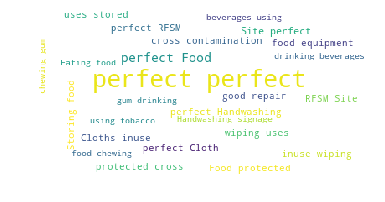

In [22]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 10']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

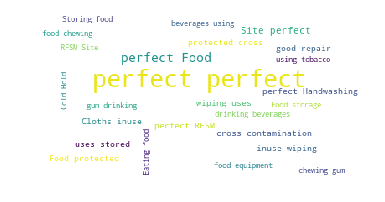

In [23]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 11']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

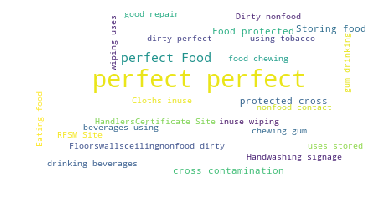

In [24]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 12']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

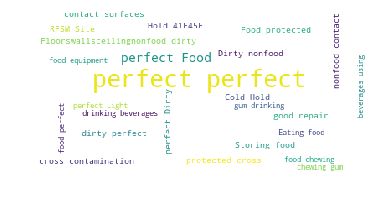

In [25]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 13']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

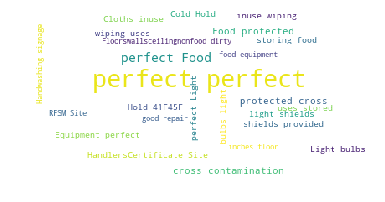

In [26]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 14']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

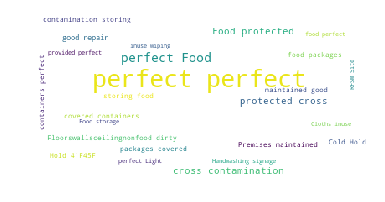

In [27]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 15']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

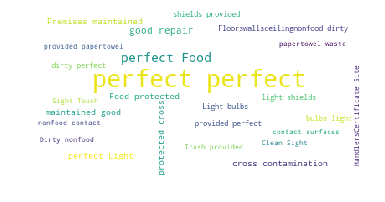

In [28]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 16']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

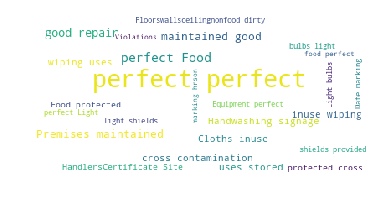

In [29]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 17']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

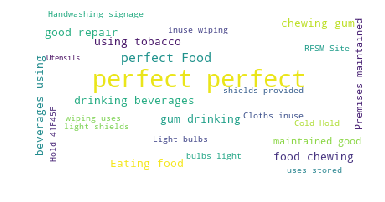

In [30]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 18']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

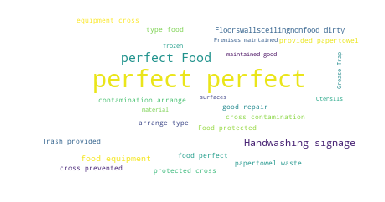

In [31]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 19']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

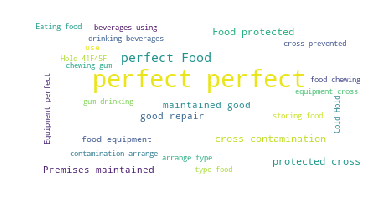

In [32]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 20']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

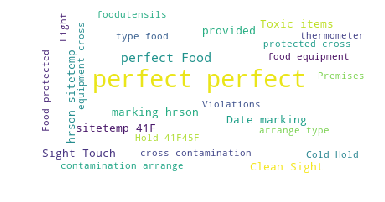

In [33]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 21']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

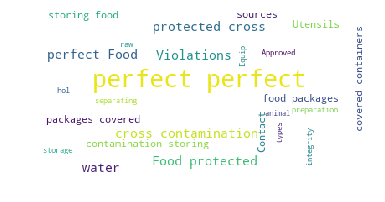

In [34]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 22']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

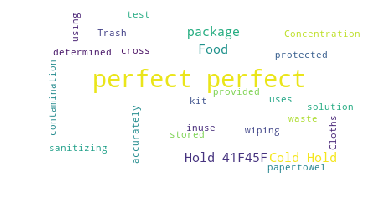

In [35]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 23']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

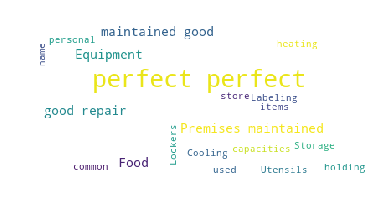

In [36]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 24']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

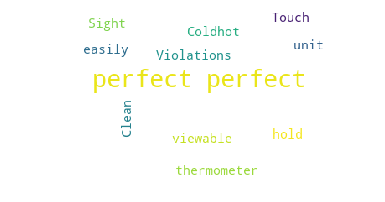

In [37]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Description - 25']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

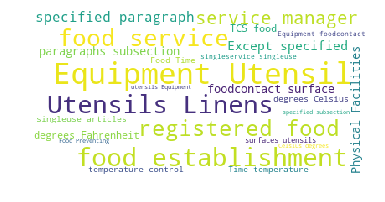

In [38]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

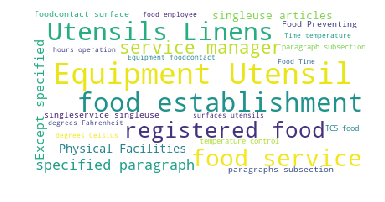

In [39]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 2']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

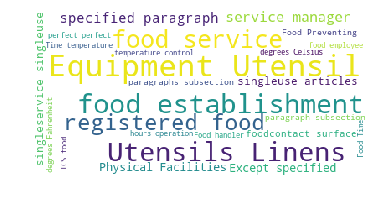

In [40]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 3']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

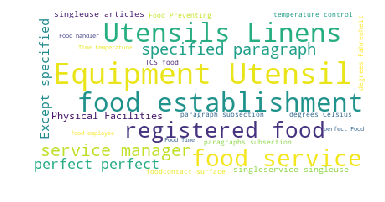

In [41]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 4']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

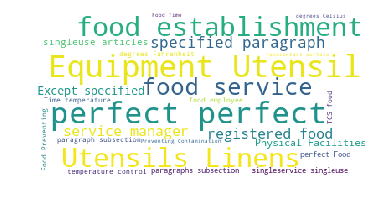

In [42]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 5']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

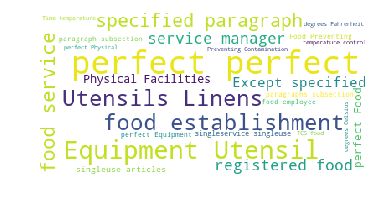

In [43]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 6']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

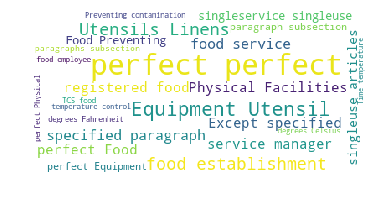

In [44]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 7']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

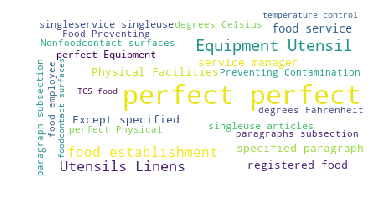

In [45]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 8']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

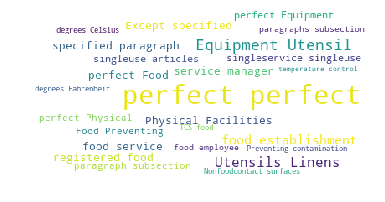

In [46]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 9']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

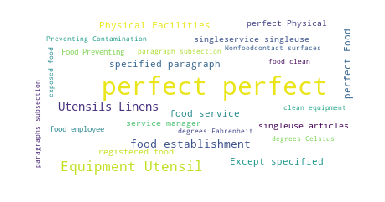

In [47]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 10']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

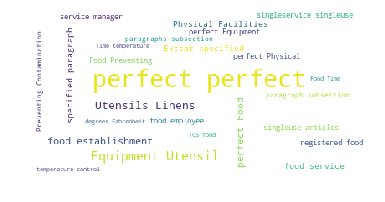

In [48]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 11']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

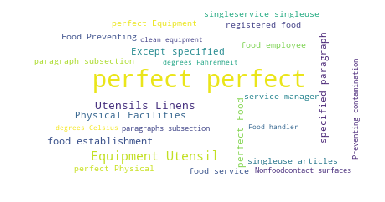

In [49]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 12']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

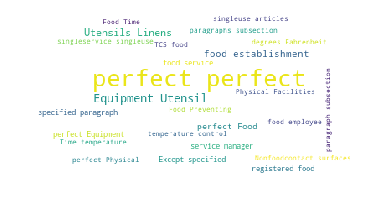

In [50]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 13']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

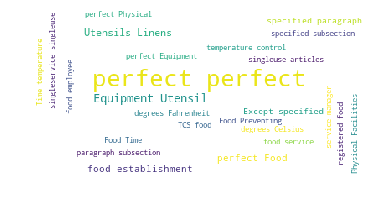

In [51]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 14']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

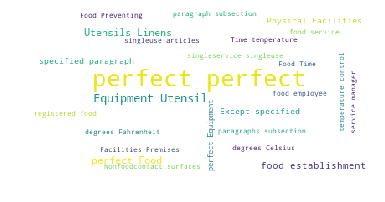

In [52]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 15']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

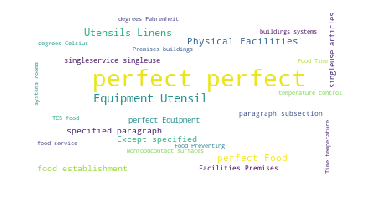

In [53]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 16']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

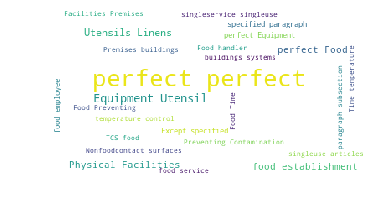

In [54]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 17']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

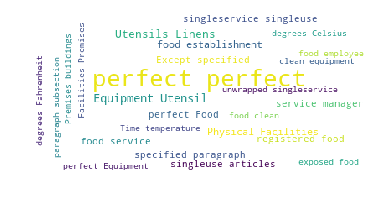

In [55]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 18']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

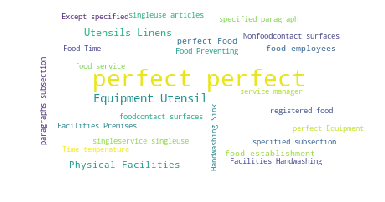

In [56]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 19']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

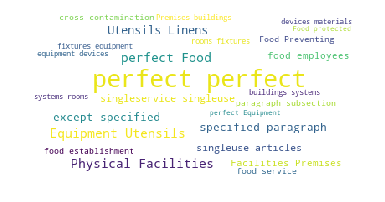

In [57]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 20']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

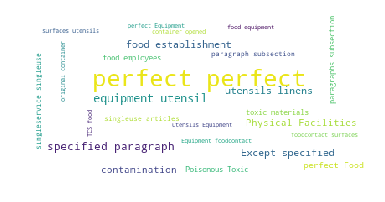

In [58]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 21']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

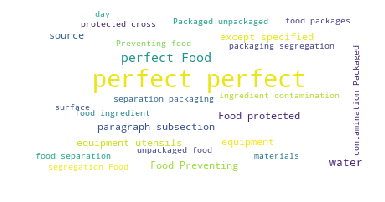

In [59]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0).generate(' '.join(data['Violation Detail - 22']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

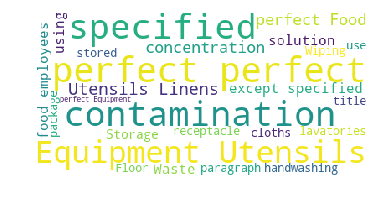

In [60]:
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0,relative_scaling=0.02).generate(' '.join(data['Violation Detail - 23']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

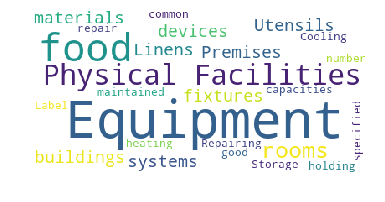

In [61]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("perfect")
wordcloud = WordCloud(background_color="white",max_words=25,random_state=0,relative_scaling=1,stopwords=stopwords).generate(' '.join(data['Violation Detail - 24']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

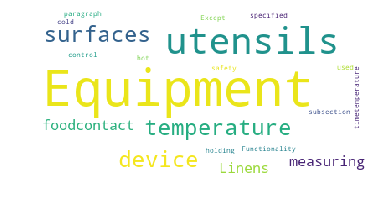

In [62]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("perfect")
wordcloud = WordCloud(background_color="white",max_words=20,random_state=0,relative_scaling=1,stopwords=stopwords).generate(' '.join(data['Violation Detail - 25']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [63]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Detail - 1'])

d1 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
d1.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,contamination,equipment,establishment,food,linens,specified,subsection,surfaces,temperature,utensils
0,0.0,0.000000,0.00000,0.334546,0.0,0.459047,0.542719,0.0,0.618718,0.000000
1,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.323316,0.45577,0.744367,0.0,0.000000,0.000000,0.0,0.000000,0.365592
3,0.0,0.000000,0.00000,0.776907,0.0,0.629615,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [64]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 2'])

d2 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d2.head(5)

,contamination,equipment,establishment,food,linens,specified,subsection,surfaces,temperature,utensils
0,0.789903,0.250092,0.000000,0.559917,0.000000,0.00000,0.0,0.0,0.0,0.000000
1,0.000000,0.638998,0.000000,0.000000,0.462542,0.44551,0.0,0.0,0.0,0.423389
2,0.000000,0.000000,0.754222,0.656620,0.000000,0.00000,0.0,0.0,0.0,0.000000
3,0.789903,0.250092,0.000000,0.559917,0.000000,0.00000,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000


In [65]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 3'])

d3 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d3.head(5)

,contamination,equipment,establishment,food,linens,perfect,shall,specified,subsection,utensils
0,0.0,0.296575,0.400848,0.723504,0.0,0.0,0.344839,0.000000,0.000000,0.33014
1,0.0,0.000000,0.000000,0.505701,0.0,0.0,0.189374,0.554268,0.633397,0.00000
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.00000
3,0.0,0.000000,0.468390,0.550767,0.0,0.0,0.294976,0.411390,0.470121,0.00000
4,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.00000


In [66]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 4'])

d4 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d4.head(5)

,contamination,equipment,establishment,food,linens,perfect,shall,specified,subsection,utensils
0,0.0,0.000000,0.465766,0.561173,0.000000,0.0,0.308705,0.406099,0.455995,0.00000
1,0.0,0.921477,0.000000,0.000000,0.000000,0.0,0.388432,0.000000,0.000000,0.00000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.00000
3,0.0,0.624149,0.000000,0.000000,0.355353,0.0,0.506530,0.346105,0.000000,0.32833
4,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000


In [67]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 5'])

d5 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d5.head(5)

,contamination,equipment,establishment,food,linens,perfect,shall,specified,subsection,utensils
0,0.0,0.286531,0.0,0.606571,0.339393,0.0,0.210849,0.326476,0.000000,0.532672
1,0.0,0.353200,0.0,0.530519,0.418361,0.0,0.259908,0.000000,0.448138,0.387805
2,0.0,0.690258,0.0,0.000000,0.482889,0.0,0.299997,0.000000,0.000000,0.447620
3,0.0,0.626589,0.0,0.000000,0.311021,0.0,0.193223,0.000000,0.000000,0.687980
4,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000


In [68]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 6'])

d6 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d6.head(5)

,contamination,equipment,establishment,food,linens,perfect,shall,specified,subsection,utensils
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000
2,0.0,0.000000,0.881714,0.360246,0.000000,0.0,0.304638,0.0,0.0,0.000000
3,0.0,0.493701,0.000000,0.000000,0.573307,0.0,0.373350,0.0,0.0,0.536831
4,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000


In [69]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 7'])

d7 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d7.head(5)

,contamination,equipment,establishment,food,linens,perfect,shall,specified,subsection,utensils
0,0.587266,0.267677,0.0,0.409473,0.307996,0.0,0.208782,0.296036,0.324585,0.290441
1,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
3,0.694193,0.000000,0.0,0.550379,0.000000,0.0,0.199114,0.282327,0.309554,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000


In [70]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=20,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 8'])

d8 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d8.head(5)

,contamination,degrees,equipment,establishment,facilities,food,handwashing,linens,physical,premises,registered,service,shall,specified,subsection,surfaces,temperature,time,used,utensils
0,0.566508,0.0,0.0,0.0,0.0,0.573164,0.0,0.0,0.0,0.351955,0.0,0.0,0.208681,0.28912,0.315501,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


In [71]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 9'])

d9 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d9.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,surfaces,utensils
0,0.837297,0.0,0.0,0.0,0.0,0.546748,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [72]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 10'])

d10 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d10.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.64699,0.0,0.29009,0.345236,0.261109,0.0,0.0,0.0,0.556674
1,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [73]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 11'])

d11 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d11.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.0,0.0,0.804315,0.0,0.594203,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [74]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 12'])

d12 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d12.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,surfaces,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 13'])

d13 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d13.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 14'])

d14 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d14.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 15'])

d15 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d15.head(5)

,contamination,equipment,establishment,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 16'])

d16 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d16.head(5)

,contamination,equipment,facilities,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 17'])

d17 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d17.head(5)

,contamination,equipment,facilities,food,linens,shall,specified,subsection,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 18'])

d18 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d18.head(5)

,equipment,establishment,facilities,food,linens,physical,shall,specified,subsection,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 19'])

d19 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d19.head(5)

,equipment,facilities,food,handwashing,linens,shall,specified,subsection,surfaces,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 20'])

d20 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d20.head(5)

,contamination,equipment,facilities,food,handwashing,physical,shall,specified,subsection,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 21'])

d21 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d21.head(5)

,contamination,equipment,establishment,food,shall,specified,subsection,surfaces,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 22'])

d22 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d22.head(5)

,contamination,equipment,food,packaged,preventing,shall,specified,subsection,utensils,water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 23'])

d23 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d23.head(5)

,contamination,control,degrees,equipment,food,handwashing,shall,specified,subsection,used
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 23'])

d23 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d23.head(5)

,contamination,control,degrees,equipment,food,handwashing,shall,specified,subsection,used
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 24'])

d24 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d24.head(5)

,equipment,facilities,fixtures,food,linens,materials,physical,premises,rooms,shall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features1 = tfidf.fit_transform(data['Violation Detail - 25'])

d25 =pd.DataFrame(features1.todense(),columns=tfidf.get_feature_names())
d25.head(5)

,devices,equipment,foodcontact,linens,measuring,shall,sight,surfaces,temperature,utensils
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
details = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25],axis = 1)

In [90]:
details.head(10)

,contamination,equipment,establishment,food,linens,specified,subsection,surfaces,temperature,utensils,...,devices,equipment,foodcontact,linens,measuring,shall,sight,surfaces,temperature,utensils
0,0.000000,0.000000,0.00000,0.334546,0.000000,0.459047,0.542719,0.000000,0.618718,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.323316,0.45577,0.744367,0.000000,0.000000,0.000000,0.000000,0.000000,0.365592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.776907,0.000000,0.629615,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.215283,0.00000,0.423659,0.264817,0.243609,0.000000,0.000000,0.689065,0.412168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.474496,0.00000,0.000000,0.244593,0.000000,0.000000,0.653571,0.000000,0.536539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.713198,0.276041,0.00000,0.477736,0.000000,0.000000,0.000000,0.432341,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 1'])
v1 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v1.head(5)

,10,21,clean,cross,equipment,food,good,perfect,rfsm,site
0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.585456,0.810704,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0


In [92]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 2'])
v2 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v2.head(5)

,10,21,clean,cross,equipment,food,good,perfect,rfsm,site
0,0.0,0.000000,0.0,0.775521,0.38837,0.49773,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.000000
2,0.0,0.586976,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.588112,0.556402
3,0.0,0.000000,0.0,0.775521,0.38837,0.49773,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,1.0,0.000000,0.000000


In [93]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 3'])
v3 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v3.head(5)

,10,21,42,47,cross,equipment,food,perfect,rfsm,site
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 4'])
v4 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v4.head(5)

,10,21,42,47,cross,equipment,food,perfect,rfsm,site
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [95]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 5'])
v5 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v5.head(5)

,21,31,42,47,cross,equipment,food,perfect,rfsm,site
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 6'])
v6 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v6.head(5)

,21,42,47,contamination,cross,equipment,food,perfect,rfsm,site
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0
2,0.0,0.0,0.639803,0.0,0.0,0.602576,0.477027,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0


In [97]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 7'])
v7 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v7.head(5)

,21,42,47,contamination,cross,dirty,equipment,food,perfect,site
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0
3,0.0,0.0,0.0,0.805672,0.0,0.0,0.0,0.592362,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0


In [98]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 8'])
v8 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v8.head(5)

,31,42,47,contamination,cross,dirty,equipment,food,rfsm,site
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 9'])
v9 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v9.head(5)

,42,45,47,contamination,cross,dirty,equipment,food,light,site
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 10'])
v10 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v10.head(5)

,42,45,47,contamination,cross,dirty,equipment,food,light,site
0,0.698371,0.0,0.0,0.0,0.0,0.715736,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [101]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 11'])
v11 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v11.head(5)

,42,45,47,contamination,cross,equipment,food,good,site,stored
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 12'])
v12 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v12.head(5)

,37,42,47,contamination,cross,dirty,equipment,food,light,site
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 13'])
v13 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v13.head(5)

,21,42,contact,contamination,cross,dirty,equipment,food,light,site
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 14'])
v14 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v14.head(5)

,42,43,47,contamination,cross,equipment,food,light,site,storage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 15'])
v15 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v15.head(5)

,42,45,contamination,cross,equipment,food,good,light,protected,shall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 16'])
v16 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v16.head(5)

,42,43,45,cross,dirty,food,light,maintained,provided,shall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 17'])
v17 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v17.head(5)

,45,47,equipment,food,good,light,maintained,premises,repair,shall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 18'])
v18 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v18.head(5)

,35,43,45,equipment,food,handwashing,light,provided,shall,site
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 19'])
v19 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v19.head(5)

,42,47,cross,equipment,food,handwashing,light,provided,shall,signage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 20'])
v20 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v20.head(5)

,45,47,contamination,cross,equipment,food,good,premises,protected,shall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 21'])
v21 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v21.head(5)

,41f,47,clean,cross,date,food,hold,hrson,provided,sight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 1'])
v1 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v1.head(5)

,10,21,clean,cross,equipment,food,good,perfect,rfsm,site
0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.585456,0.810704,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0


In [113]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 22'])
v22 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v22.head(5)

,32,37,47,contamination,cross,food,packages,protected,violations,water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 23'])
v23 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v23.head(5)

,02,37,41f45f,cold,food,hold,original,package,packages,papertowel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 24'])
v24 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v24.head(5)

,24,45,equipment,food,good,maintained,premises,repair,shall,store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',sublinear_tf = True)
features = tfidf.fit_transform(data['Violation Description - 25'])
v25 =pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
v25.head(5)

,10,29,47,clean,coldhot,easily,hold,perfect,sight,thermometer,touch,unit,viewable,violations
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
description = pd.concat([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25],axis = 1)

In [118]:
final = pd.concat([description,details,df_inspection_score],axis=1)
final.head(20)

,10,21,clean,cross,equipment,food,good,perfect,rfsm,site,...,equipment,foodcontact,linens,measuring,shall,sight,surfaces,temperature,utensils,Inspection Score
0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91
3,0.000000,0.000000,0.000000,0.0,0.0,0.585456,0.810704,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100
5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100
6,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
7,0.690805,0.000000,0.723041,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80
8,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89
9,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 2.2600e+02, 1.1960e+03, 1.1287e+04, 2.0150e+04]),
 array([ -5. ,   5.5,  16. ,  26.5,  37. ,  47.5,  58. ,  68.5,  79. ,
         89.5, 100. ]),
 <a list of 10 Patch objects>)

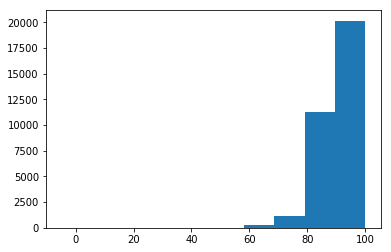

In [122]:
df_inspection_score.min()
plt.hist(df_inspection_score)